In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.decomposition import PCA
warnings.simplefilter('ignore')
matplotlib.rc('font',family = 'AppleGothic')
matplotlib.rc('axes',unicode_minus=False)
import statsmodels.api as sm
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 (분류)

## 1. 데이터 구성하기

In [3]:
df_raw=pd.read_csv("/Users/lee/Week3/HMEQ.csv",engine="python",encoding='cp949')
df_raw.head(100)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,5800,75000,90543.0,DebtCon,Mgr,18.0,0,0.0,300.487206,1.0,23,38.940575
96,0,5800,79296,86885.0,DebtCon,Mgr,19.0,0,1.0,307.974882,1.0,23,39.959109
97,1,5800,27791,46833.0,DebtCon,Mgr,3.0,0,0.0,83.289063,1.0,13,30.187805
98,0,5800,172595,250155.0,DebtCon,Sales,NaN,0,0.0,126.400984,0.0,21,43.207760


## 2. 결측치 처리

In [4]:
#결측치 확인
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [5]:
df_raw["JOB"].fillna("Other",inplace=True)
df_raw.fillna(df_raw.mean(),inplace=True)

## 3. 더미변수 생성

In [6]:
df_raw_dummy=pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [7]:
df_raw=df_raw_dummy
df_raw_y=df_raw["BAD"]
df_raw_x=df_raw.drop("BAD",axis=1,inplace=False)

## 4. 데이터 분할

In [8]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

## 5. 기본 옵션 모델 생성

In [9]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

print("정확도 Training Set : {:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("정확도 Test Set : {:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

정확도 Training Set : 1.000
정확도 Test Set : 0.946


## 6. n-estimators 파라미터 조정

In [19]:
train_accuracy=[];test_accuracy=[];
para_n_tree= [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators=v_n_estimators,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
rf_accuracy_n= pd.DataFrame()
rf_accuracy_n["n_estimators"]=para_n_tree
rf_accuracy_n["Train Accuracy"]=train_accuracy
rf_accuracy_n["Test Accuracy"]=test_accuracy

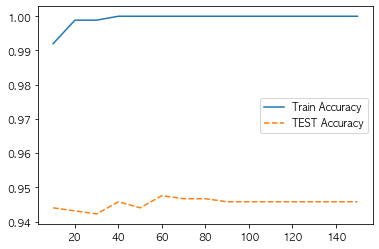

In [20]:
rf_accuracy_n.round(3)
plt.plot(para_n_tree,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_n_tree,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

## 7. max-depth 파라미터 조정

In [22]:
train_accuracy=[];test_accuracy=[];
para_depth= [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth,n_estimators=60, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
rf_accuracy_depth= pd.DataFrame()
rf_accuracy_depth["Depth"]=para_depth
rf_accuracy_depth["Train Accuracy"]=train_accuracy
rf_accuracy_depth["Test Accuracy"]=test_accuracy

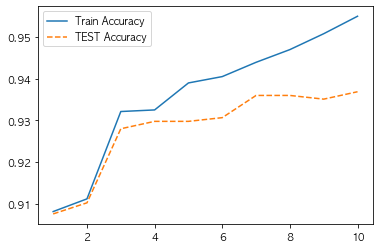

In [25]:
rf_accuracy_n.round(3)

plt.plot(para_depth,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_depth,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

## 8. min-samples-split 파라미터 조정

In [26]:
train_accuracy=[];test_accuracy=[];
para_split= [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split=v_min_samples_split,max_depth = 4,n_estimators=60, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
rf_accuracy_split= pd.DataFrame()
rf_accuracy_split["Min_samples_split"]=para_split
rf_accuracy_split["Train Accuracy"]=train_accuracy
rf_accuracy_split["Test Accuracy"]=test_accuracy

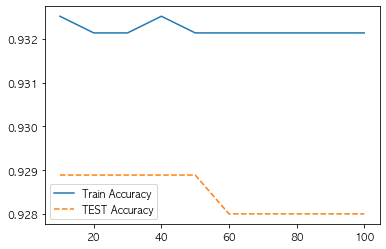

In [28]:
rf_accuracy_split.round(3)

plt.plot(para_split,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_split,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

## 9. min-samples-leaf 파라미터 조정

In [31]:
train_accuracy=[];test_accuracy=[];
para_leaf= [n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf=v_min_samples_leaf,min_samples_split=30,max_depth = 4,n_estimators=60, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
rf_accuracy_leaf= pd.DataFrame()
rf_accuracy_leaf["Min_samples_leaf"]=para_leaf
rf_accuracy_leaf["Train Accuracy"]=train_accuracy
rf_accuracy_leaf["Test Accuracy"]=test_accuracy

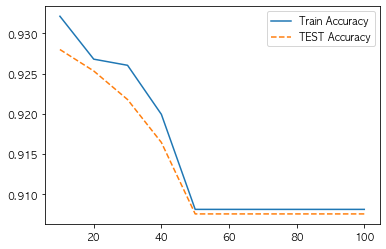

In [32]:
rf_accuracy_leaf.round(3)

plt.plot(para_leaf,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_leaf,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

## 9. 최종 모델 선택

In [46]:
rf_final=RandomForestClassifier(min_samples_leaf=50,min_samples_split=30,max_depth=4,n_estimators=60,random_state=1234)

rf_final.fit(df_train_x,df_train_y)

y_pred=rf_final.predict(df_test_x)

print("Traning set 정확도 : {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("TEST set 정확도 : {:.3f}".format(rf_final.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Traning set 정확도 : 0.908
TEST set 정확도 : 0.908
Confusion matrix:
[[1021    0]
 [ 104    0]]


## 10. 설명 변수의 중요도

Text(0, 0.5, '설명변수')

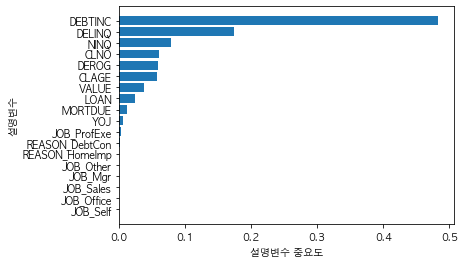

In [47]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

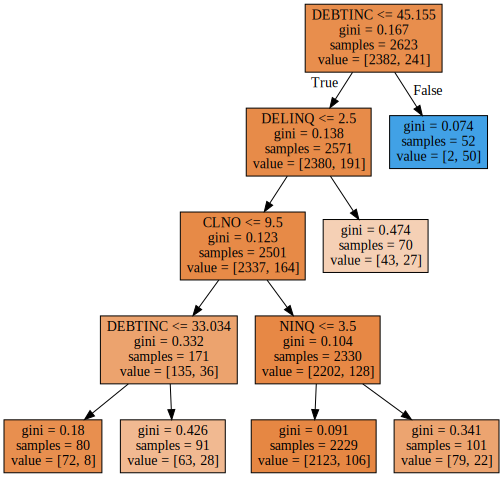

In [57]:
rf_graph=DecisionTreeClassifier(min_samples_leaf=50,min_samples_split=30,max_depth=4,random_state=1234)
rf_graph.fit(df_train_x,df_train_y)

export_graphviz(rf_graph,out_file="rf_depth.dot",
               feature_names=v_feature_name,impurity=True,filled=True)
with open("rf_depth.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

## 11. GRIDSEARCHCV